# Update Gaussian Process

### Fit Gaussian Process To H band
![h-fit](gp_h1.png)

### Fit Gaussian Process To J/H

![gp-j](gp_j.png) 
![gp-j-samples](gp_j_samples.png)
![gp-j-samples-smooth](gp_j_samples_smooth.png)

### Fit Gaussian Process To V/H

![gp-v](gp_v.png) 
![gp-v-samples](gp_v_samples.png)
![gp-v-samples-smooth](gp_v_samples_smooth.png)

### Fit Gaussian Process To Z/H

![gp-z](gp_z.png) 
![gp-z-samples](gp_z_samples.png)
![gp-z-samples-smooth](gp_z_samples_smooth.png)

### Histograms of Scaling Values 

![j-hist](j_hist.png)
![v-hist](v_hist.png)
![z-hist](z_hist.png)

In [13]:
from __future__ import division, print_function

# adds parent dir to python path
import sys
sys.path.insert(0, '..')

import json

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import gphelper as gp
import DataTools as dt

In [41]:
import importlib
importlib.reload(gp)

with open('./gp-models/band_ratio_scales.json', 'r') as f:
    band_scales = json.load(f)
    band_scales = {b:dt._nmpy_decode(band_scales[b]) for b in band_scales.keys()}


h_model = gp.GPHelper(restore_file='./gp-models/gp_h.json')
x = h_model.X
h_line = h_model.sample(h_model.X)

j_model = gp.GPHelper(restore_file='./gp-models/gp_j.json')
j_line = j_model.sample(x, smooth=False, monotonic=False)
j_scale = np.random.choice(band_scales['j'])

v_model = gp.GPHelper(restore_file='./gp-models/gp_v.json')
v_line = v_model.sample(x, smooth=True, monotonic=False)
v_scale = np.random.choice(band_scales['v'])

z_model = gp.GPHelper(restore_file='./gp-models/gp_z.json')
z_line = z_model.sample(x, smooth=True, monotonic=False)
z_scale = np.random.choice(band_scales['z'])

/home/ryanhausen/anaconda3/lib/python3.6/site-packages/sklearn/gaussian_process/gpr.py:339: RuntimeWarning: covariance is not positive-semidefinite.
  y_samples = rng.multivariate_normal(y_mean, y_cov, n_samples).T


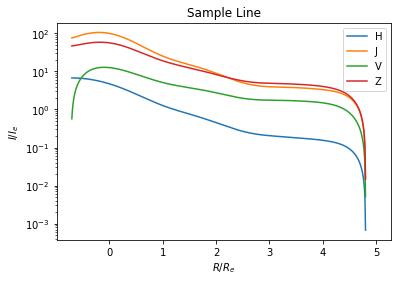

In [44]:
plt.title('Sample Line')
plt.ylabel('$I/I_e$')
plt.xlabel('$R/R_e$')
plt.semilogy(x, h_line, label='H')
plt.semilogy(x, h_line*j_line*j_scale, label='J')
plt.semilogy(x, h_line*v_line*v_scale, label='V')
plt.semilogy(x, h_line*z_line*z_scale, label='Z')
plt.legend()